# Spotify Project - DS4200
## Saariya Faraz, Sahaj Baxi, Daman Anand

### Preparation  adding data and changing some columns

In [54]:
pip install vegafusion

Note: you may need to restart the kernel to use updated packages.


In [55]:
pip install "vl-convert-python>=1.6.0"

Note: you may need to restart the kernel to use updated packages.


In [56]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [57]:
import pandas as pd
import altair as alt
import vegafusion as vf

df = pd.read_csv("dataset.csv")

In [58]:
df.head()

Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1         0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2         0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3         0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4         0.618  0.4430  ...    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580    0.715   87.917               4     acoustic  
1          0.000006    0.1010    0.267   77.489               4     acoustic  
2          0.000000    0.1170    0.120   76.332               4     acoustic  
3          0.000071    0.1320    0.143  181.740               3     acoustic  
4          0.000000    0.0829    0.167  119.949               4     acoustic  

[5 rows x 21 columns]

In [59]:
# enabling VegaFusion
alt.data_transformers.enable("vegafusion")

DataTransformerRegistry.enable('vegafusion')

In [60]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [61]:
df['duration_ms']
# Convert duration_ms to duration in minutes
df['duration_min'] = df['duration_ms'] / 60000
# Check the first few rows to see the converted values
df[['track_name', 'duration_ms', 'duration_min']].head()

track_name  duration_ms  duration_min
0                      Comedy       230666      3.844433
1            Ghost - Acoustic       149610      2.493500
2              To Begin Again       210826      3.513767
3  Can't Help Falling In Love       201933      3.365550
4                     Hold On       198853      3.314217

### Visualization 1 - Saariya

 duration distribution histogram... we wanna see song duration distribution - aim would be to check if popularity vs duration is not just bc theres more longer songs in oue dataset 

In [65]:
# Assuming 'df' is your dataframe
chart = alt.Chart(df).mark_bar(color='skyblue').encode(  # Change color of bins to 'skyblue'
    alt.X('duration_min:Q', bin=alt.Bin(maxbins=50, extent=[0, 90])),
    alt.Y('count():Q'),
    alt.Tooltip(['duration_min', 'count()'])
).properties(
    title='Song Duration Distribution',
    width=800,  
    height=500 
)

chart

ValueError: Expected an object with dunder __arrow_c_schema__

alt.Chart(...)

### Visualization 2 - Saariya

In [68]:
# Dropdown for region selection
dropdown = alt.binding_radio(options=list(df['track_genre'].unique()), name='Select Track: ')
region_selection = alt.selection_point(fields=['track_genre'], bind=dropdown, empty='none')

# Scatter plot with filters
scatter = alt.Chart(df).mark_circle(size=100).encode(
    x=alt.X('danceability:Q', title='danceability'),
    y=alt.Y('popularity:Q', title='popularity'),
    color=alt.condition(region_selection, 
                        alt.Color('explicit:N'), 
                        alt.value('white')),
    opacity=alt.condition(region_selection, alt.value(1), alt.value(0.000005)),
    tooltip=['track_name', 'artists', 'popularity']
).add_selection(region_selection)

scatter

/var/folders/09/5tgpmtwn3hjb9s1p68nlhz680000gn/T/ipykernel_90387/2129066303.py:14: AltairDeprecationWarning:


Deprecated since `altair=5.0.0`. Use add_params instead.



ValueError: Expected an object with dunder __arrow_c_schema__

alt.Chart(...)

In [69]:
df

Unnamed: 0                track_id                 artists  \
0                0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1                1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2                2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3                3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4                4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...            ...                     ...                     ...   
113995      113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996      113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997      113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998      113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999      113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit  \
0                           Comedy          73       230666     False   
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
4                          Hold On          82       198853     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  ...  mode  speechiness  acousticness  \
0              0.676  0.4610  ...     0       0.1430        0.0322   
1              0.420  0.1660  ...     1       0.0763        0.9240   
2              0.438  0.3590  ...     1       0.0557        0.2100   
3              0.266  0.0596  ...     1       0.0363        0.9050   
4              0.618  0.4430  ...     1       0.0526        0.4690   
...              ...     ...  ...   ...          ...           ...   
113995         0.172  0.2350  ...     1       0.0422        0.6400   
113996         0.174  0.1170  ...     0       0.0401        0.9940   
113997         0.629  0.3290  ...     0       0.0420        0.8670   
113998         0.587  0.5060  ...     1       0.0297        0.3810   
113999         0.526  0.4870  ...     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.976000    0.1050   0.0350   85.239               4   
113997          0.000000    0.0839   0.7430  132.378               4

**Sahaj Visualizations**



**INteractive**

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

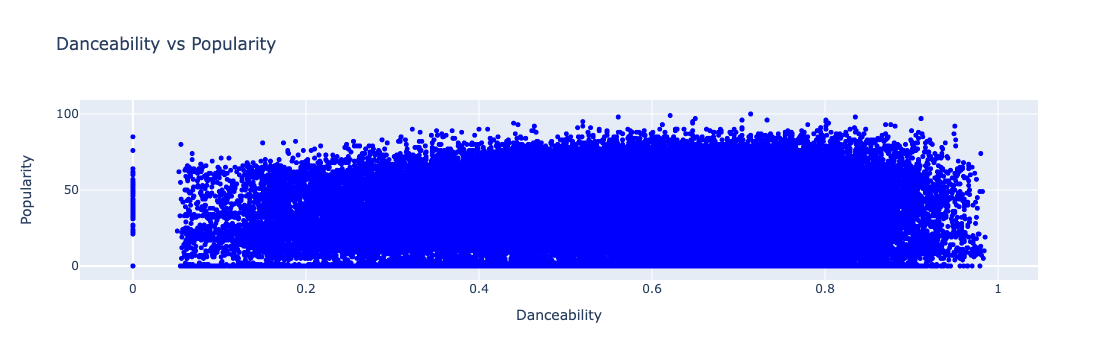

In [74]:
if 'danceability' not in df.columns or 'popularity' not in df.columns:
    print("Error: DataFrame must have 'danceability' and 'popularity' columns")
else:
    fig = px.scatter(df, 
                     x='danceability', 
                     y='popularity', 
                     title='Danceability vs Popularity',
                     labels={'danceability': 'Danceability', 
                             'popularity': 'Popularity'},
                     color_discrete_sequence=['blue'])

    fig.update_traces(marker=dict(size=5))
    
    fig.update_layout(
        hoverlabel=dict(
            bgcolor="white",
            font_size=16,
            font_family="Rockwell"
        )
    )

    # Show the plot
    fig.show()


**non-interactive**

In [85]:
# Get the top 3 genres by count and filetring the dataframe to make a new one
top_3_genres = df['track_genre'].value_counts().nlargest(3).index.tolist()

# Filter the dataframe to include only the top 3 genres
df_top_genres = df[df['track_genre'].isin(top_3_genres)]

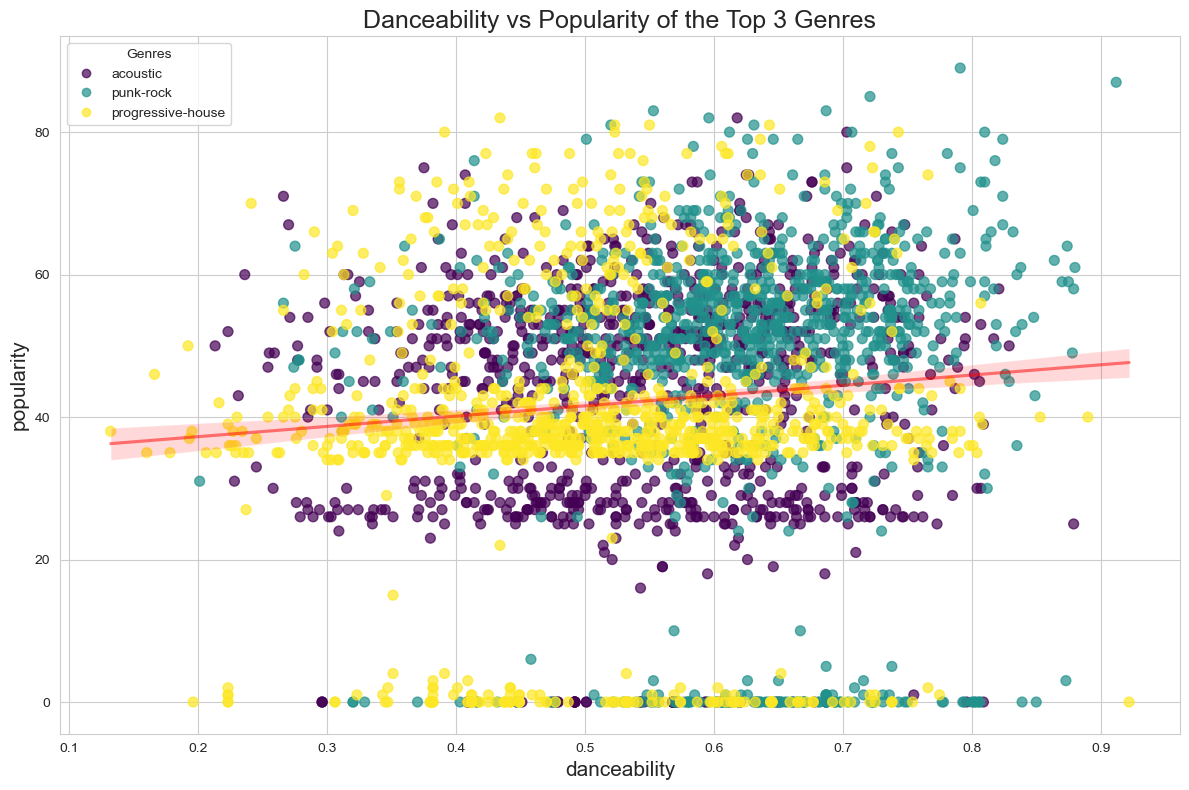

In [87]:

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

scatter = plt.scatter(df_top_genres['danceability'], 
                      df_top_genres['popularity'], 
                      c=df_top_genres['track_genre'].astype('category').cat.codes, 
                      cmap='viridis', 
                      alpha=0.7, 
                      s=50)

plt.title('Danceability vs Popularity of the Top 3 Genres', fontsize=18)
plt.xlabel('Danceability', fontsize=15)
plt.ylabel('Popularity', fontsize=15)

plt.legend(handles=scatter.legend_elements()[0], 
           labels=top_3_genres, 
           title='Genres')

sns.regplot(x='danceability', y='popularity', data=df_top_genres, 
            scatter=False, 
            color='red', 
            line_kws={'alpha': 0.5}) 

plt.tight_layout()

plt.show()


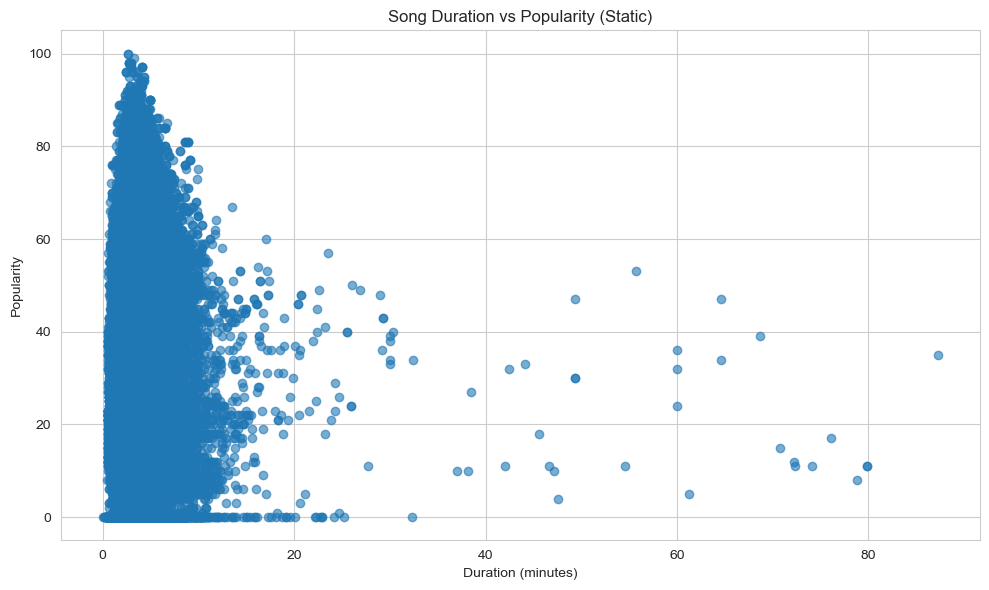

In [90]:
#Visualizations - Daman 

#Non Interactive 
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("dataset.csv")

# Convert duration to minutes
df['duration_min'] = df['duration_ms'] / 60000

#  scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df['duration_min'], df['popularity'], alpha=0.6)
plt.title('Song Duration vs Popularity (Static)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Popularity')
plt.grid(True)
plt.tight_layout()
plt.show()



In [98]:

import altair as alt

# Interactive scatter plot
chart = alt.Chart(df).mark_circle(size=60).encode(
    x=alt.X('duration_min', title='Duration (minutes)'),
    y=alt.Y('popularity', title='Popularity'),
    tooltip=['duration_min', 'popularity']
).properties(
    title='Song Duration vs Popularity (Interactive)',
    width=600,
    height=400
).interactive()

chart


ValueError: Expected an object with dunder __arrow_c_schema__

alt.Chart(...)